In [1]:
# Necessary imports

import numpy as np
import pandas as pd

from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

import statsmodels.api as sm
from statsmodels.tsa.api import Holt

import prepare

import warnings
warnings.filterwarnings("ignore")

# Plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [2]:
# Acquire the data

df = pd.read_csv('GlobalLandTemperaturesByState.csv')
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [3]:
# Check the shape

df.shape

(645675, 5)

In [4]:
# Make sure the dates are in datetime format

df.rename(columns = {'dt':'Date'}, inplace = True)

In [5]:
# Make date the index

df = df.set_index('Date').sort_index()

In [6]:
# Make sure the dates are in datetime format

df.index = pd.to_datetime(df.index)

In [7]:
df.head()

,AverageTemperature,AverageTemperatureUncertainty,State,Country
Date,,,,
1743-11-01,1.909,2.033,Nova Scotia,Canada
1743-11-01,0.753,2.817,Michigan,United States
1743-11-01,0.665,2.208,Prince Edward Island,Canada
1743-11-01,-0.526,2.304,Pskov,Russia
1743-11-01,1.891,1.718,Massachusetts,United States


In [8]:
df.index

DatetimeIndex(['1743-11-01', '1743-11-01', '1743-11-01', '1743-11-01',
               '1743-11-01', '1743-11-01', '1743-11-01', '1743-11-01',
               '1743-11-01', '1743-11-01',
               ...
               '2013-09-01', '2013-09-01', '2013-09-01', '2013-09-01',
               '2013-09-01', '2013-09-01', '2013-09-01', '2013-09-01',
               '2013-09-01', '2013-09-01'],
              dtype='datetime64[ns]', name='Date', length=645675, freq=None)

In [9]:
# Add a column for year

df['Year'] = df.index.year
df.head()

,AverageTemperature,AverageTemperatureUncertainty,State,Country,Year
Date,,,,,
1743-11-01,1.909,2.033,Nova Scotia,Canada,1743
1743-11-01,0.753,2.817,Michigan,United States,1743
1743-11-01,0.665,2.208,Prince Edward Island,Canada,1743
1743-11-01,-0.526,2.304,Pskov,Russia,1743
1743-11-01,1.891,1.718,Massachusetts,United States,1743


In [10]:
# Filter for Texas

tx_df = df[df['State'].str.contains("Texas")]
tx_df

,AverageTemperature,AverageTemperatureUncertainty,State,Country,Year
Date,,,,,
1820-01-01,4.489,3.369,Texas,United States,1820
1820-02-01,9.081,2.873,Texas,United States,1820
1820-03-01,12.657,2.423,Texas,United States,1820
1820-04-01,19.215,2.501,Texas,United States,1820
1820-05-01,22.577,2.495,Texas,United States,1820
...,...,...,...,...,...
2013-05-01,22.628,0.158,Texas,United States,2013
2013-06-01,27.841,0.220,Texas,United States,2013
2013-07-01,27.630,0.182,Texas,United States,2013


In [11]:
# Check for nulls

tx_df.isnull().sum()

AverageTemperature               0
AverageTemperatureUncertainty    0
State                            0
Country                          0
Year                             0
dtype: int64

In [12]:
# Describe the data

tx_df.describe().T

,count,mean,std,min,25%,50%,75%,max
AverageTemperature,2325.0,18.107234,7.413791,1.965,11.206,18.378,25.398,31.401
AverageTemperatureUncertainty,2325.0,0.794785,0.893291,0.044,0.180,0.310,1.241,4.950
Year,2325.0,1916.375484,55.942931,1820.000,1868.000,1916.000,1965.000,2013.000


In [13]:
# Converting the AvgTemp from celcius to fahrenheit

tx_df['AverageTemperature'] = (tx_df['AverageTemperature']*9/5)+32

In [14]:
# Check the converted data

tx_df

,AverageTemperature,AverageTemperatureUncertainty,State,Country,Year
Date,,,,,
1820-01-01,40.0802,3.369,Texas,United States,1820
1820-02-01,48.3458,2.873,Texas,United States,1820
1820-03-01,54.7826,2.423,Texas,United States,1820
1820-04-01,66.5870,2.501,Texas,United States,1820
1820-05-01,72.6386,2.495,Texas,United States,1820
...,...,...,...,...,...
2013-05-01,72.7304,0.158,Texas,United States,2013
2013-06-01,82.1138,0.220,Texas,United States,2013
2013-07-01,81.7340,0.182,Texas,United States,2013


### Takeaways
- much smaller dataset after filtering for only Texas
- no nulls
- converted temps from celcius to fahrenheit

In [15]:
# Split the data

train, validate, test = prepare.split(tx_df, stratify_by=None)

In [16]:
# Check out the split

train.shape, validate.shape, test.shape

((1302, 5), (558, 5), (465, 5))

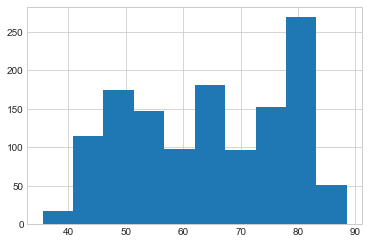

In [17]:
# Histogram of average temp

train.AverageTemperature.hist()

In [18]:
# Set target as y - in this case using historic temperature to predict future temperature

y = train.AverageTemperature
y.head()

Date
1906-10-01    60.9962
1925-01-01    43.3220
1924-05-01    68.7722
1890-04-01    64.2020
1863-02-01    49.7858
Name: AverageTemperature, dtype: float64

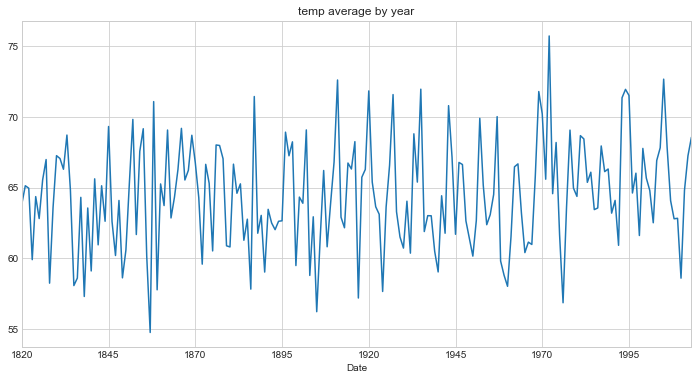

In [19]:
# Visualize temp average by year

plt.figure(figsize=(12,6))
y.resample('Y').mean().plot(title='temp average by year')

<Figure size 864x432 with 0 Axes>

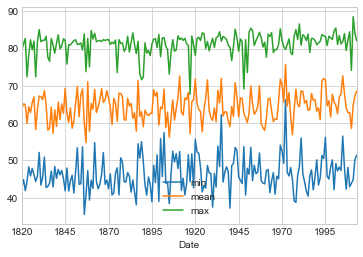

In [20]:
# Visualize monthly min, mean, max sales

plt.figure(figsize=(12,6))
y.resample('Y').agg(['min', 'mean', 'max']).plot()

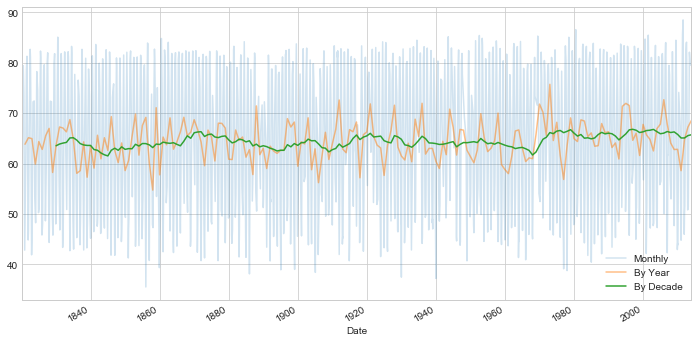

In [22]:
# Plot the rolling avg

plt.figure(figsize=(12,6))
y.plot(alpha=.2, label='Monthly')
y.resample('Y').mean().rolling(1).mean().plot(alpha=.5, label='By Year')
y.resample('Y').mean().rolling(10).mean().plot(alpha=8, label='By Decade')
plt.legend()